In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, ensemble, svm, naive_bayes
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, precision_score, f1_score

from sklearn.ensemble import VotingClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import norm

# Explarotary Data Analysis

In [9]:
df = pd.read_csv(r'C:\Users\hafeez_poldz\Desktop\Thinkful\Unit 3\data\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The dataset has 31 columns and 284806 entries. Only the target variable is categorical, the rest are continuous. We don't have missing values in the dataset and all input variables are float type. 

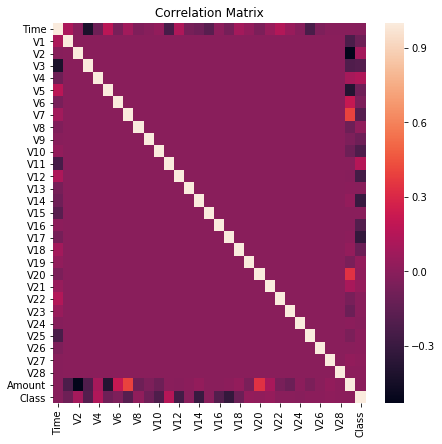

In [12]:
# correlation matrix
plt.figure(figsize = (7,7))
corr_mat = df.corr()
_ = sns.heatmap(corr_mat)
_.set(title = 'Correlation Matrix')
plt.show()

From the correlation heatmap, we can observe very low (mostly zero) multicollinearity among the features. Also I notice that the Amount is not normalized as the rest of the variables except Time. 

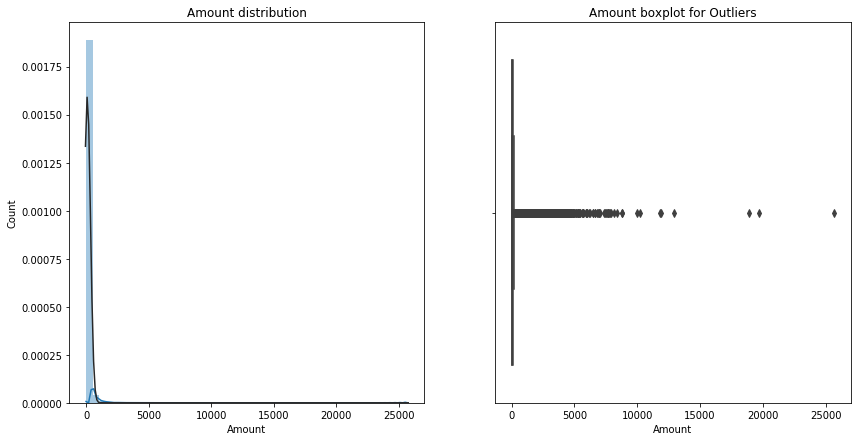

In [13]:
# Amount distribution
plt.figure(figsize = (14,7))
plt.subplot(121)
_ = sns.distplot(df.Amount, fit = norm)
_.set(title = 'Amount distribution', xlabel = 'Amount', ylabel = 'Count')

# boxplot for outliers
plt.subplot(122)
_ = sns.boxplot(df.Amount)
_.set(title = 'Amount boxplot for Outliers')
plt.show()

The 'Amount' distribution is not normal and this variable has outliers. I don't want to remove them now, but scale. 

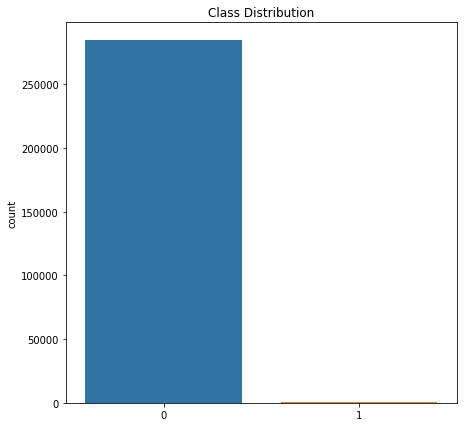

In [14]:
# target variable distribution
plt.figure(figsize = (7,7))
_ = sns.barplot(x = df.Class.unique(), y = df.Class.value_counts())
_.set(title = 'Class Distribution', ylabel = "count")
plt.show()

The 'class' is our dependent variable and the above-depicted figure shows that we have a class imbalance problem. In the dataset, the number of negative samples is very large meaning that the false positive rate increases more slowly. 

Because the dataset is huge, instead of SMOTE (Synthetic Minority Over-sampling) I'll use sci-kit learn RandomUnderSampler module to fix the unbalanced category distribution in the outcome variable. With a large number of entries in a dataset, undersampling of the majority class is cost-effective.

# Data Preparation

In [15]:
# normalize Amount feature
scaler  = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# peincipal component analysis
X = df.drop('Class', axis = 1)
#pca = PCA(n_components = 16)
#data_pca = pca.fit_transform(X)

# dealing with class imbalance using RandomUnderSampler
rus  = RandomUnderSampler()
#X = data_pca
Y = df.Class

X_s, Y_s = rus.fit_sample(X,Y)

print(X_s.shape)
print(Y_s.shape)

(984, 30)
(984,)


After undersampling, the lenght of the entries decreased to 984. Lets check the outcome variable distribution again.

In [16]:
count = np.bincount(Y_s)
print('number of 0\'s {} \nnumber of 1\'s {}'.format(
        count[0], count[1]))

number of 0's 492 
number of 1's 492


# Classification Models
To predict the outcome variable I'll test a few classification algorithms and compare their performance. For this specific problem(credit fraud) I want to minimize the recall. False Negative predictions mean that the model could not identify True credit card frauds and labels them as non-fraud transactions. Before testing models, I'll define a function to minimize workload.

In [17]:
# define a fucntion to fit and predict ML models
def run_model(mod, model_name, X, Y):
    print(model_name)
    mod.fit(X,Y)
    Y_ = mod.predict(X)
    # accuracy tables.
    table_acc = pd.crosstab(Y, Y_, margins=True)

    tI_errors = table_acc.loc[0.0,1.0] / table_acc.loc['All','All']
    tII_errors = table_acc.loc[1.0,0.0] / table_acc.loc['All','All']
    print((
    'Accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n').format(tI_errors*100, tII_errors*100))
    print('Accuracy Score: ' + str(mod.score(X, Y)) + '\n')

    # cross validation
    cvs = cross_val_score(mod, X, Y, cv=10)
    print("\n10 Folds Cross Validation Score Statistics: %0.5f (+/- %0.5f)" % (cvs.mean(), cvs.std() * 2))
    print('Recall Score: ', recall_score(Y, Y_))
    print('Precision Score: ', precision_score(Y, Y_))
    print('F1 Score: ', f1_score(Y, Y_))

    f, ax = plt.subplots(figsize =(5,5))
    sns.heatmap(table_acc, annot = True,linewidths=0.5, cmap = 'YlGnBu',fmt = ".0f", ax=ax)
    plt.title("Confusion Matrix")
    plt.xlabel("predicted Y values")
    plt.ylabel("actual Y values")
    plt.show()


## Model 1. Gaussian Naive Bayes

Gaussian Naive Bayes
Accuracy:
Percent Type I errors: 0.5081300813008129
Percent Type II errors: 12.5

Accuracy Score: 0.8699186991869918


10 Folds Cross Validation Score Statistics: 0.85943 (+/- 0.16945)
Recall Score:  0.75
Precision Score:  0.9866310160427807
F1 Score:  0.8521939953810624


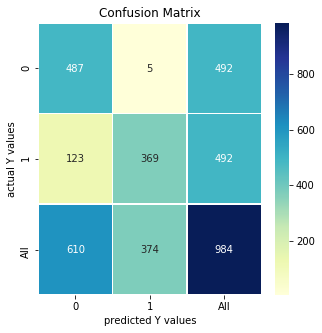

In [18]:
# Gaussian Naive Bayes
gnb = naive_bayes.GaussianNB()
run_model(gnb, 'Gaussian Naive Bayes', X_s, Y_s)

## Model 2. Logistic Regression (Lasso regularization)

In [26]:
# looking for the best C value
c_values = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_search_lr = GridSearchCV(linear_model.LogisticRegression(penalty='l1'), c_values)
grid_search_lr.fit(X_s, Y_s)
grid_search_lr.best_params_

{'C': 10}

Logistic Regression
Accuracy:
Percent Type I errors: 0.8130081300813009
Percent Type II errors: 3.4552845528455287

Accuracy Score: 0.9573170731707317


10 Folds Cross Validation Score Statistics: 0.93298 (+/- 0.07422)
Recall Score:  0.9308943089430894
Precision Score:  0.9828326180257511
F1 Score:  0.9561586638830898


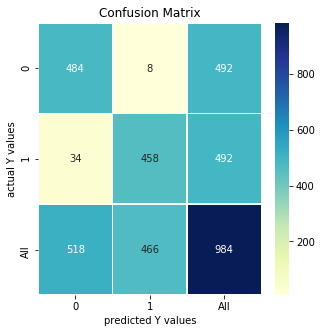

In [27]:
# Logistic Regression Ridge technique
lr = linear_model.LogisticRegression(penalty = 'l1', C = 10)
run_model(lr, 'Logistic Regression', X_s, Y_s)

## Model 3. Suppor Vector Classifier

In [15]:
# prameter tuning with GridSearchCV
c_values = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': c_values, 'gamma' : gammas}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid = param_grid, cv=10)
grid_search.fit(X_s, Y_s)
grid_search.best_params_

{'C': 0.001, 'gamma': 0.001}

Support Vector Classifier
Accuracy:
Percent Type I errors: 0.10162601626016261
Percent Type II errors: 9.146341463414634

Accuracy Score: 0.907520325203252


10 Folds Cross Validation Score Statistics: 0.89096 (+/- 0.14718)
Recall Score:  0.8170731707317073
Precision Score:  0.9975186104218362
F1 Score:  0.8983240223463687


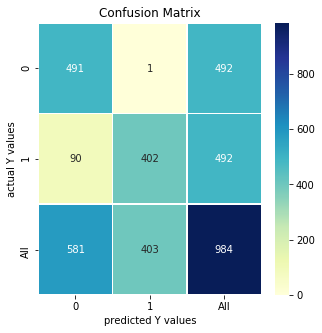

In [16]:
# Support Vector Classifier
svc = svm.SVC(kernel = 'linear', C = 0.001, gamma = 0.001)
run_model(svc, 'Support Vector Classifier', X_s, Y_s)

## Model 4. Random Forest Classifier

In [17]:
# prameter tuning with GridSearchCV
param_grid = {'n_estimators': [100, 200, 300, 400, 500],
             'max_depth': [2, 4, 6, 8, 10],
             'min_samples_leaf': [2,12],
             'bootstrap': [True, False]}
grid_search = GridSearchCV(ensemble.RandomForestClassifier(), param_grid = param_grid, cv=10)
grid_search.fit(X_s, Y_s)
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'min_samples_leaf': 2,
 'n_estimators': 300}

Random Forest Classifier
Accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 3.4552845528455287

Accuracy Score: 0.9654471544715447


10 Folds Cross Validation Score Statistics: 0.94094 (+/- 0.07750)
Recall Score:  0.9308943089430894
Precision Score:  1.0
F1 Score:  0.9642105263157895


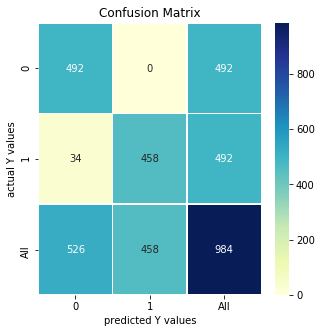

In [18]:
params = {'bootstrap': True,
 'max_depth': 6,
 'min_samples_leaf': 2,
 'n_estimators': 500}
rfc = ensemble.RandomForestClassifier(**params)
run_model(rfc, 'Random Forest Classifier', X_s, Y_s)

## Stochastic Gradient Boosting Classifier

In [19]:
# create the parameter grid based on the results of random search
param_grid = {
    'min_samples_leaf': [3, 10],
    'min_samples_split': [2, 12],
    'max_depth': [2, 50],
    'n_estimators': [100, 500, 1500],
    'loss': ['exponential', 'deviance'],
    'subsample': [0.1, 1]}

grid_search = GridSearchCV(ensemble.GradientBoostingClassifier(), param_grid=param_grid,
                           cv=10)
grid_search.fit(X_s, Y_s)
grid_search.best_params_

{'loss': 'deviance',
 'max_depth': 50,
 'min_samples_leaf': 10,
 'min_samples_split': 12,
 'n_estimators': 100,
 'subsample': 1}

Gradient Boosting Classifier
Accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0

Accuracy Score: 1.0


10 Folds Cross Validation Score Statistics: 0.94090 (+/- 0.07532)
Recall Score:  1.0
Precision Score:  1.0
F1 Score:  1.0


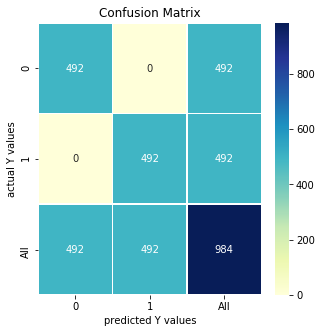

In [20]:
# fit the model
params = {'loss': 'exponential',
 'max_depth': 50,
 'min_samples_leaf': 10,
 'min_samples_split': 12,
 'n_estimators': 100,
 'subsample': 1}
gbc = ensemble.GradientBoostingClassifier(**params)
run_model(gbc, 'Gradient Boosting Classifier', X_s, Y_s)

# AdaBoost Classifier

AdaBoost Classifier
Accuracy:
Percent Type I errors: 0.5081300813008129
Percent Type II errors: 0.9146341463414633

Accuracy Score: 0.9857723577235772


10 Folds Cross Validation Score Statistics: 0.92873 (+/- 0.09009)
Recall Score:  0.9817073170731707
Precision Score:  0.9897540983606558
F1 Score:  0.9857142857142857


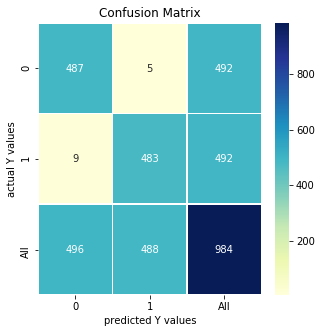

In [21]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=50, random_state=42)
run_model(ada, 'AdaBoost Classifier', X_s, Y_s)

# Vonting Ensemble Classifier
The last model I want to fit is the voting ensemble model. I'll combine the predictions of Logistic Regression, Decision Tree and Gaussian Naive Bayes Classifiers. Then Voting Classifier will wrap the models and average the predictions of the sub-models when asked to make predictions for new data.

Voting Ensemble
Accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 3.353658536585366

Accuracy Score: 0.9664634146341463


10 Folds Cross Validation Score Statistics: 0.92565 (+/- 0.10349)
Recall Score:  0.9329268292682927
Precision Score:  1.0
F1 Score:  0.9652996845425867


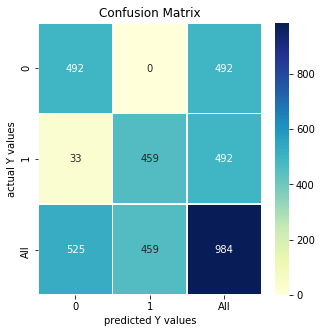

In [20]:
from sklearn.tree import DecisionTreeClassifier
kfold = KFold(n_splits=10, random_state=42)
# create the sub models
estimators = []

lr  = linear_model.LogisticRegression(penalty = 'l1', C=10)
dtc = DecisionTreeClassifier()
svc = svm.SVC()
estimators.append(('logistic regression', lr))
#estimators.append(('support vector machine', svc))
estimators.append(('gaussian naive bayes', gnb))
estimators.append(('decision tree classifier', dtc))
# create the ensemble model
ensemble_model = VotingClassifier(estimators)
run_model(ensemble_model, 'Voting Ensemble', X_s, Y_s)

# Conclusion
Here is the overview of the models performance:

### Gaussian Naive Bayes
 - Accuracy: 0.85 (std: 0.17)
 - Recall: 0.74
 - Precision: 0.99

### Logistic Regression (Lasso)
 - Accuracy: 0.93 (std: 0.07)
 - Recall: 0.93
 - Precision: 0.98

### Support Vector Classifier
 - Accuracy: 0.89 (std: 0.15)
 - Recall: 0.82
 - Precision: 0.99

### Random Forest Calssifier
 - Accuracy: 0.94 (std: 0.08)
 - Recall: 0.93
 - Precision: 1

### Stochastic Gradient Boosting
 - Accuracy: 0.94 (std: 0.08)
 - Recall: 1
 - Precision: 1

### AdaBoost Classifier
 - Accuracy: 0.93 (std: 0.09)
 - Recall: 0.98
 - Precision: 0.99
 
### Voting Ensemble Model
 - Accuracy: 0.93 (std: 0.1)
 - Recall: 0.93
 - Precision: 1